## We run each simulation as follows and save the results in the form of pandas Dataframe

In [3]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [4]:
%load_ext autoreload
%autoreload 2

In [6]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

In [11]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [12]:
# the setting for AAMAS2024 results
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #Max trip distance in meter
params.dist_threshold_min = 3000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01
params.d2d.B_income = 1

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms.
params.platforms.base_fare = 1.4 #https://www.uber.com/global/en/price-estimate/
params.platforms.fare = float(1.2)#https://www.uber.com/global/en/price-estimate/
params.platforms.min_fare = float(4) # https://www.uber.com/global/en/price-estimate/
params.d2d.fuel_cost = 0.25 #euro/km #https://help.ubercarshare.com/hc/en-gb/articles/360022882131-Choosing-your-car-s-distance-rate  
params.platforms.comm_rate = float(0.20) 
params.platforms.discount = float(0.0) 
params.platforms.daily_marketing = False
params.platforms.incentive = float(0.0)

params.d2d.learning_d = 1 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.18
params.d2d.B_Marketing = 0.02
params.d2d.diffusion_speed = 10/100 # for marketing and word of mouth
params.d2d.m = 5
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000 # number of passengers
params.nV = 200 # number of drivers
params.nD = 400 # number of simulation days
params.simTime = 4 # based on amsterdam uber report
params.d2d.res_wage = params.simTime*11.16 #https://www.government.nl/topics/minimum-wage/amount-of-the-hourly-minimum-wage

In [ ]:
sim = MaaSSim.simulators.simulate(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

#### Figure 2: This study’s research gap and contribution 

C:\Users\farno\AppData\Local\Temp/ipykernel_20656/1438527823.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aj_date = nyc.loc[6:].date; aj_date[6] = pd.Timestamp('2013-01-19')
C:\Users\farno\AppData\Local\Temp/ipykernel_20656/1438527823.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj_date = nyc.loc[16:].date; dj_date[16] = pd.Timestamp('2013-11-20')


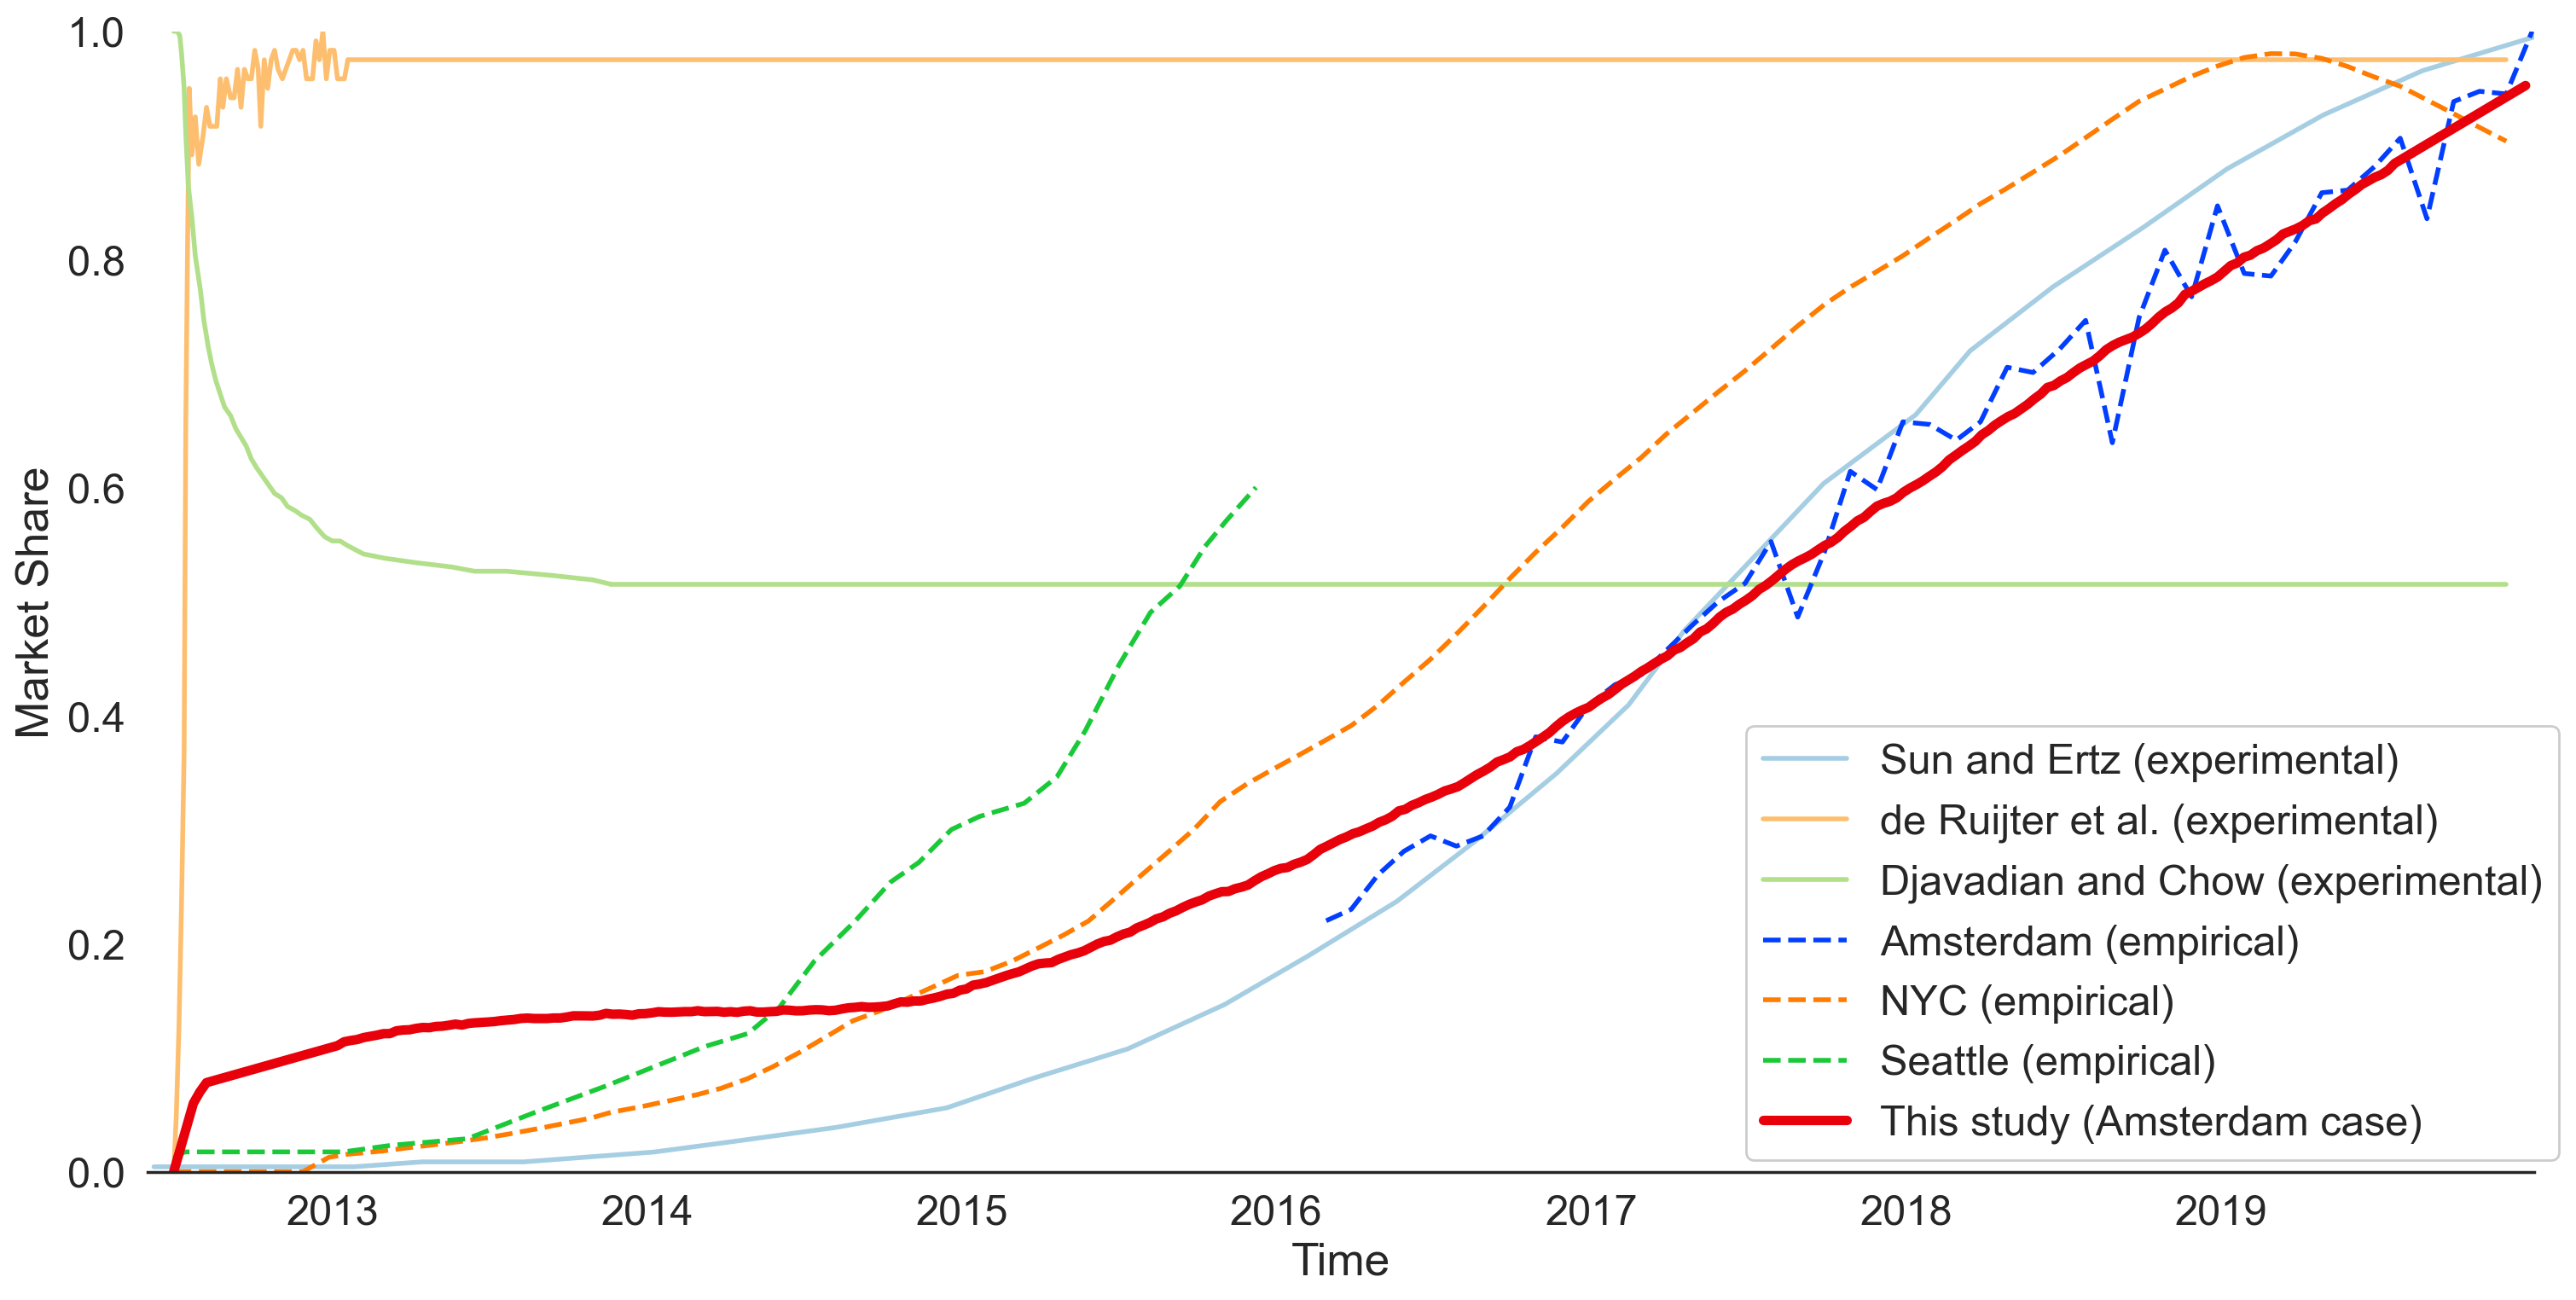

In [34]:
# Here we use min-max scaling or normalization: https://www.linkedin.com/advice/1/what-pros-cons-different-scaling-methods-data-normalization#:~:text=Data%20normalization%20and%20scaling%20can%20be%20achieved%20through%20several%20methods,dividing%20by%20the%20maximum%20value.

sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
sns.despine(left=True)

bright = sns.color_palette("bright")
blues = sns.color_palette("Blues")
greys = sns.color_palette("Greys")
paired = sns.color_palette("Paired")
#State-of-art-----------------------------------------------------------------------
ertz_max = ertz.supply_share.max()
ertz_last_v = ertz.supply_share[len(ertz)-1]
sns.lineplot(x=ertz.loc[0:29].date, y=ertz.loc[0:29].supply_share/ertz_max,lw=2, label = 'Sun and Ertz (experimental)', color=paired[0], linestyle = 'solid')
# sns.lineplot(x=ertz.loc[30:].date, y=ertz.loc[30:].supply_share/ertz_max,lw=1, color='C2', marker = '.')

arjan_max = arjan.supply_share.max()
arjan_last_v = arjan.supply_share[len(arjan)-1]
sns.lineplot(x=arjan.date, y=arjan.supply_share/arjan_max, lw=2, label = 'de Ruijter et al. (experimental)', color=paired[6], linestyle = 'solid')
aj_date = nyc.loc[6:].date; aj_date[6] = pd.Timestamp('2013-01-19')
sns.lineplot(x=aj_date, y=arjan_last_v/arjan_max, lw=2, color=paired[6], linestyle = 'solid')

djavadian_max = djavadian.supply_share.max()
djavadian_last_v = djavadian.supply_share[len(djavadian)-1]
sns.lineplot(x=djavadian.date, y=djavadian.supply_share/djavadian_max,lw=2, label = 'Djavadian and Chow (experimental)', color=paired[2], linestyle = 'solid')
dj_date = nyc.loc[16:].date; dj_date[16] = pd.Timestamp('2013-11-20')
sns.lineplot(x=dj_date, y=djavadian_last_v/djavadian_max,lw=2, color=paired[2], linestyle = 'solid')

#Empirical-----------------------------------------------------------------------
ams_max = ams['Number_of_drivers'].max()
ams_y =ams['Number_of_drivers']# smooth(ams['Number_of_drivers'], w=9)
ams_y = [0 if math.isnan(y) else y/ams_max for y in ams_y]
ams_y[0] = 0.22; ams_y[1] = 0.23
sns.lineplot(x=ams.date, y=ams_y,lw=2, label = 'Amsterdam (empirical)', color=bright[0], linestyle = 'dashed')

nyc_max = nyc['Unique Dispatched Vehicles'].max()
nyc_smoothed = smooth(nyc['Unique Dispatched Vehicles'], w=9)
nyc_y = nyc_smoothed[0:89]+list(nyc[89:97]['Unique Dispatched Vehicles'])+nyc_smoothed[97:]
nyc_y = [0 if math.isnan(y) else y/nyc_max for y in nyc_y]
# nyc_x = [x for x in range(1,len(nyc_y)+1)]
sns.lineplot(x=nyc.date, y=nyc_y,lw=2, label = 'NYC (empirical)', color=bright[1], linestyle = 'dashed')

sea_max = sea.supply_share.max()
sns.lineplot(x=sea.date, y=0.6*sea.supply_share/sea_max,lw=2, label = 'Seattle (empirical)', color=bright[2], linestyle = 'dashed')
#Us-----------------------------------------------------------------------
me_max = me.supply_share.max()
me_last_v = me.supply_share[len(me)-1]
yme = me.supply_share/me_max
yme = smooth(yme)
yme[0:5] = [0,0.02,0.04,0.06,0.07]
sns.lineplot(x=me.date, y=yme,lw=4, label = 'This study (Amsterdam case)', color=bright[3])

ax.set(xlabel='Time', ylabel='Market Share',xlim=(pd.Timestamp('2012-06-01 00:00:00')
,pd.Timestamp('2019-12-30 00:00:00')), ylim=(0,1))
# labels = ['Ghasemi and Kucharski','NYC (Empirical)', 'Amsterdam (Empirical)', 'Miami (Empirical)', 'Djavadian and Chow', 'Sun and Ertz']
ax.legend(frameon=True,framealpha=1, loc=(0.67,0.01))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)

plt.tight_layout()
# plt.savefig('Fig2.png')

#### Figure 3:  Temporal evolution of choice probability (red) and three components of utility for four sampled agents with various temporal trajectories

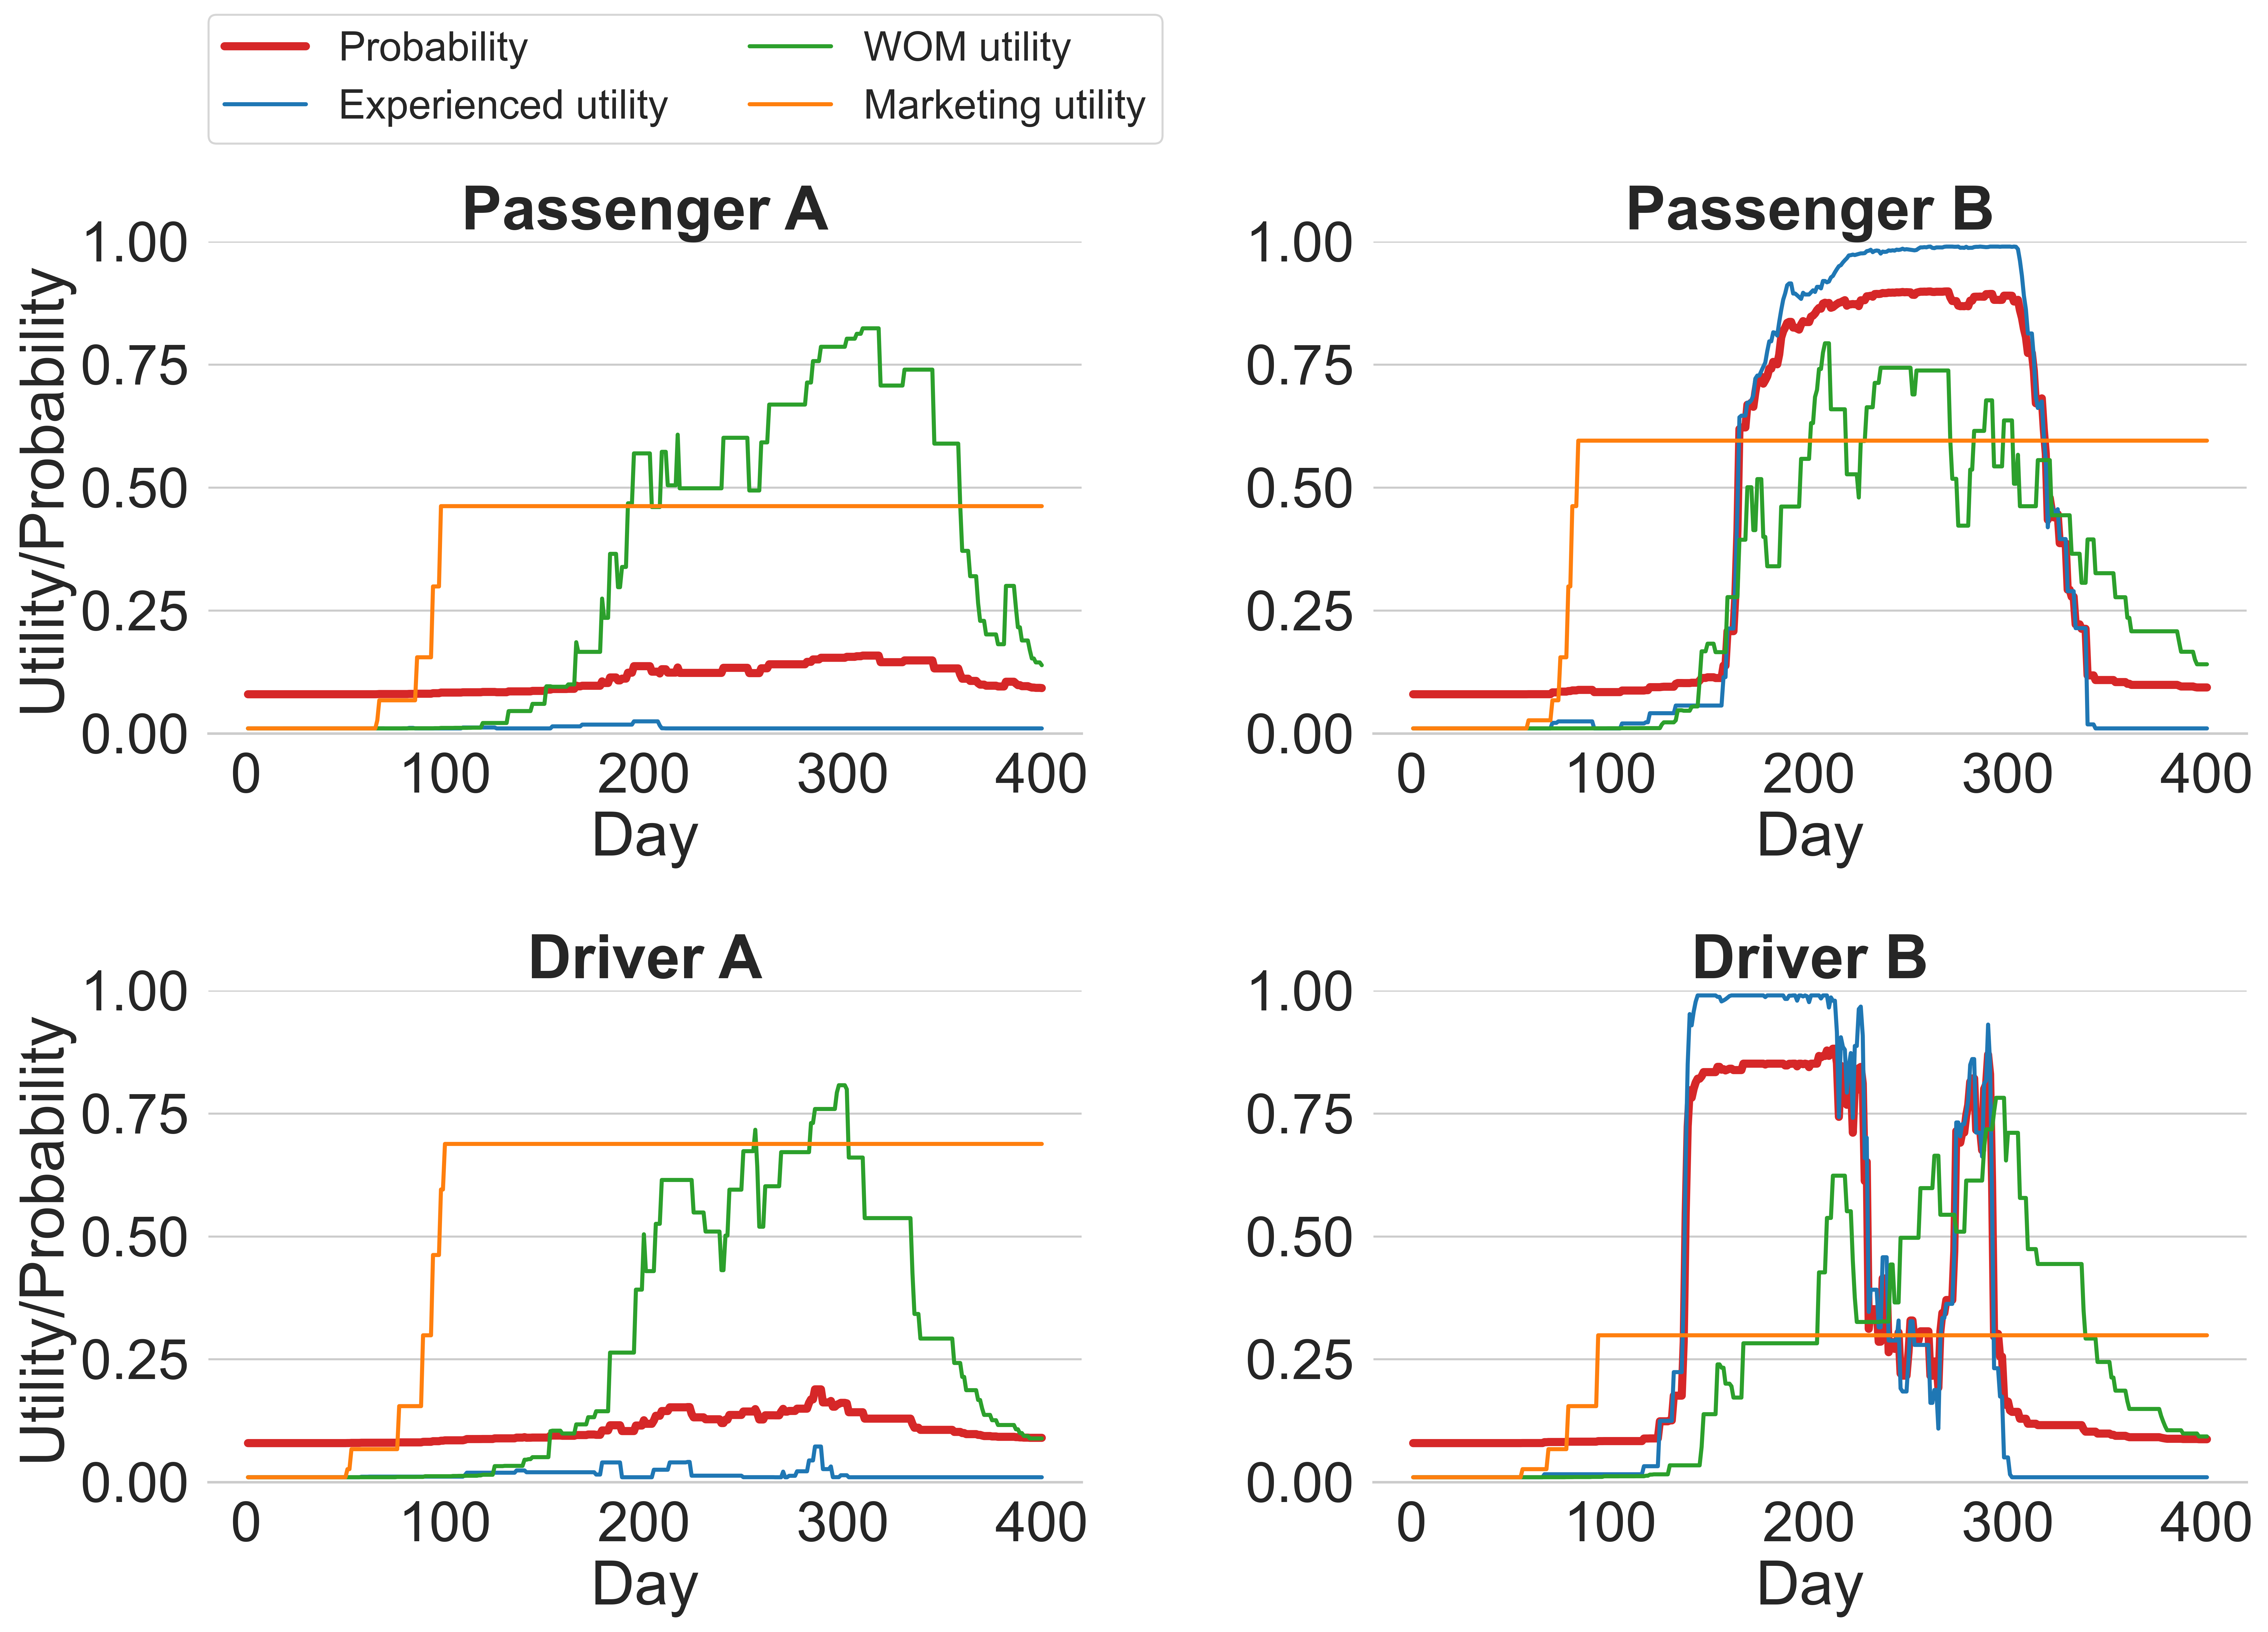

In [99]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=2.5)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
sns.despine(left=True)

ids = [3,8,2,37]
n = 0

for i in range(0,4):
    
    x = []; ye = []; ym = []; yw = []; yu = []; yp = []
    if i<2:
        pax_id = ids[i]
        for d in range(0,sim.params.nD):
            ye.append(sim.res[d].pax_exp.loc[pax_id].EXPERIENCE_U)
            ym.append(sim.res[d].pax_exp.loc[pax_id].MARKETING_U)
            yw.append(sim.res[d].pax_exp.loc[pax_id].WOM_U)
            u = (params.d2d.B_Experience*ye[-1])+(params.d2d.B_Marketing*ym[-1])+(params.d2d.B_WOM*yw[-1])
            yu.append(u)
            yp.append((math.exp(params.d2d.m*u))/(math.exp(params.d2d.m*u) + math.exp(params.d2d.m*0.5)))
    else:
        veh_id = ids[i]
        for d in range(0,sim.params.nD):
            ye.append(sim.res[d].veh_exp.loc[veh_id].EXPERIENCE_U)
            ym.append(sim.res[d].veh_exp.loc[veh_id].MARKETING_U)
            yw.append(sim.res[d].veh_exp.loc[veh_id].WOM_U)
            u = (params.d2d.B_Experience*ye[-1])+(params.d2d.B_Marketing*ym[-1])+(params.d2d.B_WOM*yw[-1])
            yu.append(u)
            yp.append((math.exp(params.d2d.m*u))/(math.exp(params.d2d.m*u) + math.exp(params.d2d.m*0.5)))

    if n<2:
        x = [i for i in range(1,len(ye)+1)]
        sns.lineplot(x=x, y=yp, label = 'Probability', color='C3', linewidth=4, ax=ax[0,n])#, marker='o')
        sns.lineplot(x=x, y=ye, label = 'Experienced utility', color='C0', lw=2, ax=ax[0,n])#, marker='o')
        sns.lineplot(x=x, y=yw, label = 'WOM utility', color='C2',lw=2, ax=ax[0,n])#, marker='o')
        sns.lineplot(x=x, y=ym, label = 'Marketing utility', color='C1',lw=2, ax=ax[0,n])#, marker='o')

        ax[0,n].set(xlabel='Day', ylim=(0,1))
        ax[0,n].grid(axis='x')
        n += 1
        
    else:
        x = [i for i in range(1,len(ye)+1)]
        sns.lineplot(x=x, y=yp, label = 'Probability', color='C3', linewidth=4, ax=ax[1,n-2])#, marker='o')
        sns.lineplot(x=x, y=ye, label = 'Experienced utility', color='C0', lw=2, ax=ax[1,n-2])#, marker='o')
        sns.lineplot(x=x, y=yw, label = 'WOM utility', color='C2',lw=2, ax=ax[1,n-2])#, marker='o')
        sns.lineplot(x=x, y=ym, label = 'Marketing utility', color='C1',lw=2, ax=ax[1,n-2])#, marker='o')
        # sns.lineplot(x=x, y=yu, label = 'TOTAL_U', ax=ax[n])#, marker='o')

        ax[1,n-2].set(xlabel='Day', ylim=(0,1))
        ax[1,n-2].grid(axis='x')
        n += 1
    
ax[0,0].legend(loc=(0,1.2), frameon=True, ncol=2, fontsize=20)
ax[0,0].set(ylabel='Utility/Probability'); ax[1,0].set(ylabel='Utility/Probability')
ax[0,1].get_legend().set_visible(False);ax[1,0].get_legend().set_visible(False);ax[1,1].get_legend().set_visible(False)
ax[0,0].set_title('Passenger A',fontweight='bold');ax[0,1].set_title('Passenger B',fontweight='bold');ax[1,0].set_title('Driver A',fontweight='bold');ax[1,1].set_title('Driver B',fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig3.png')

#### Figure 4: Six stages and 400 days of the evolution of the market entry strategy in Amsterdam 

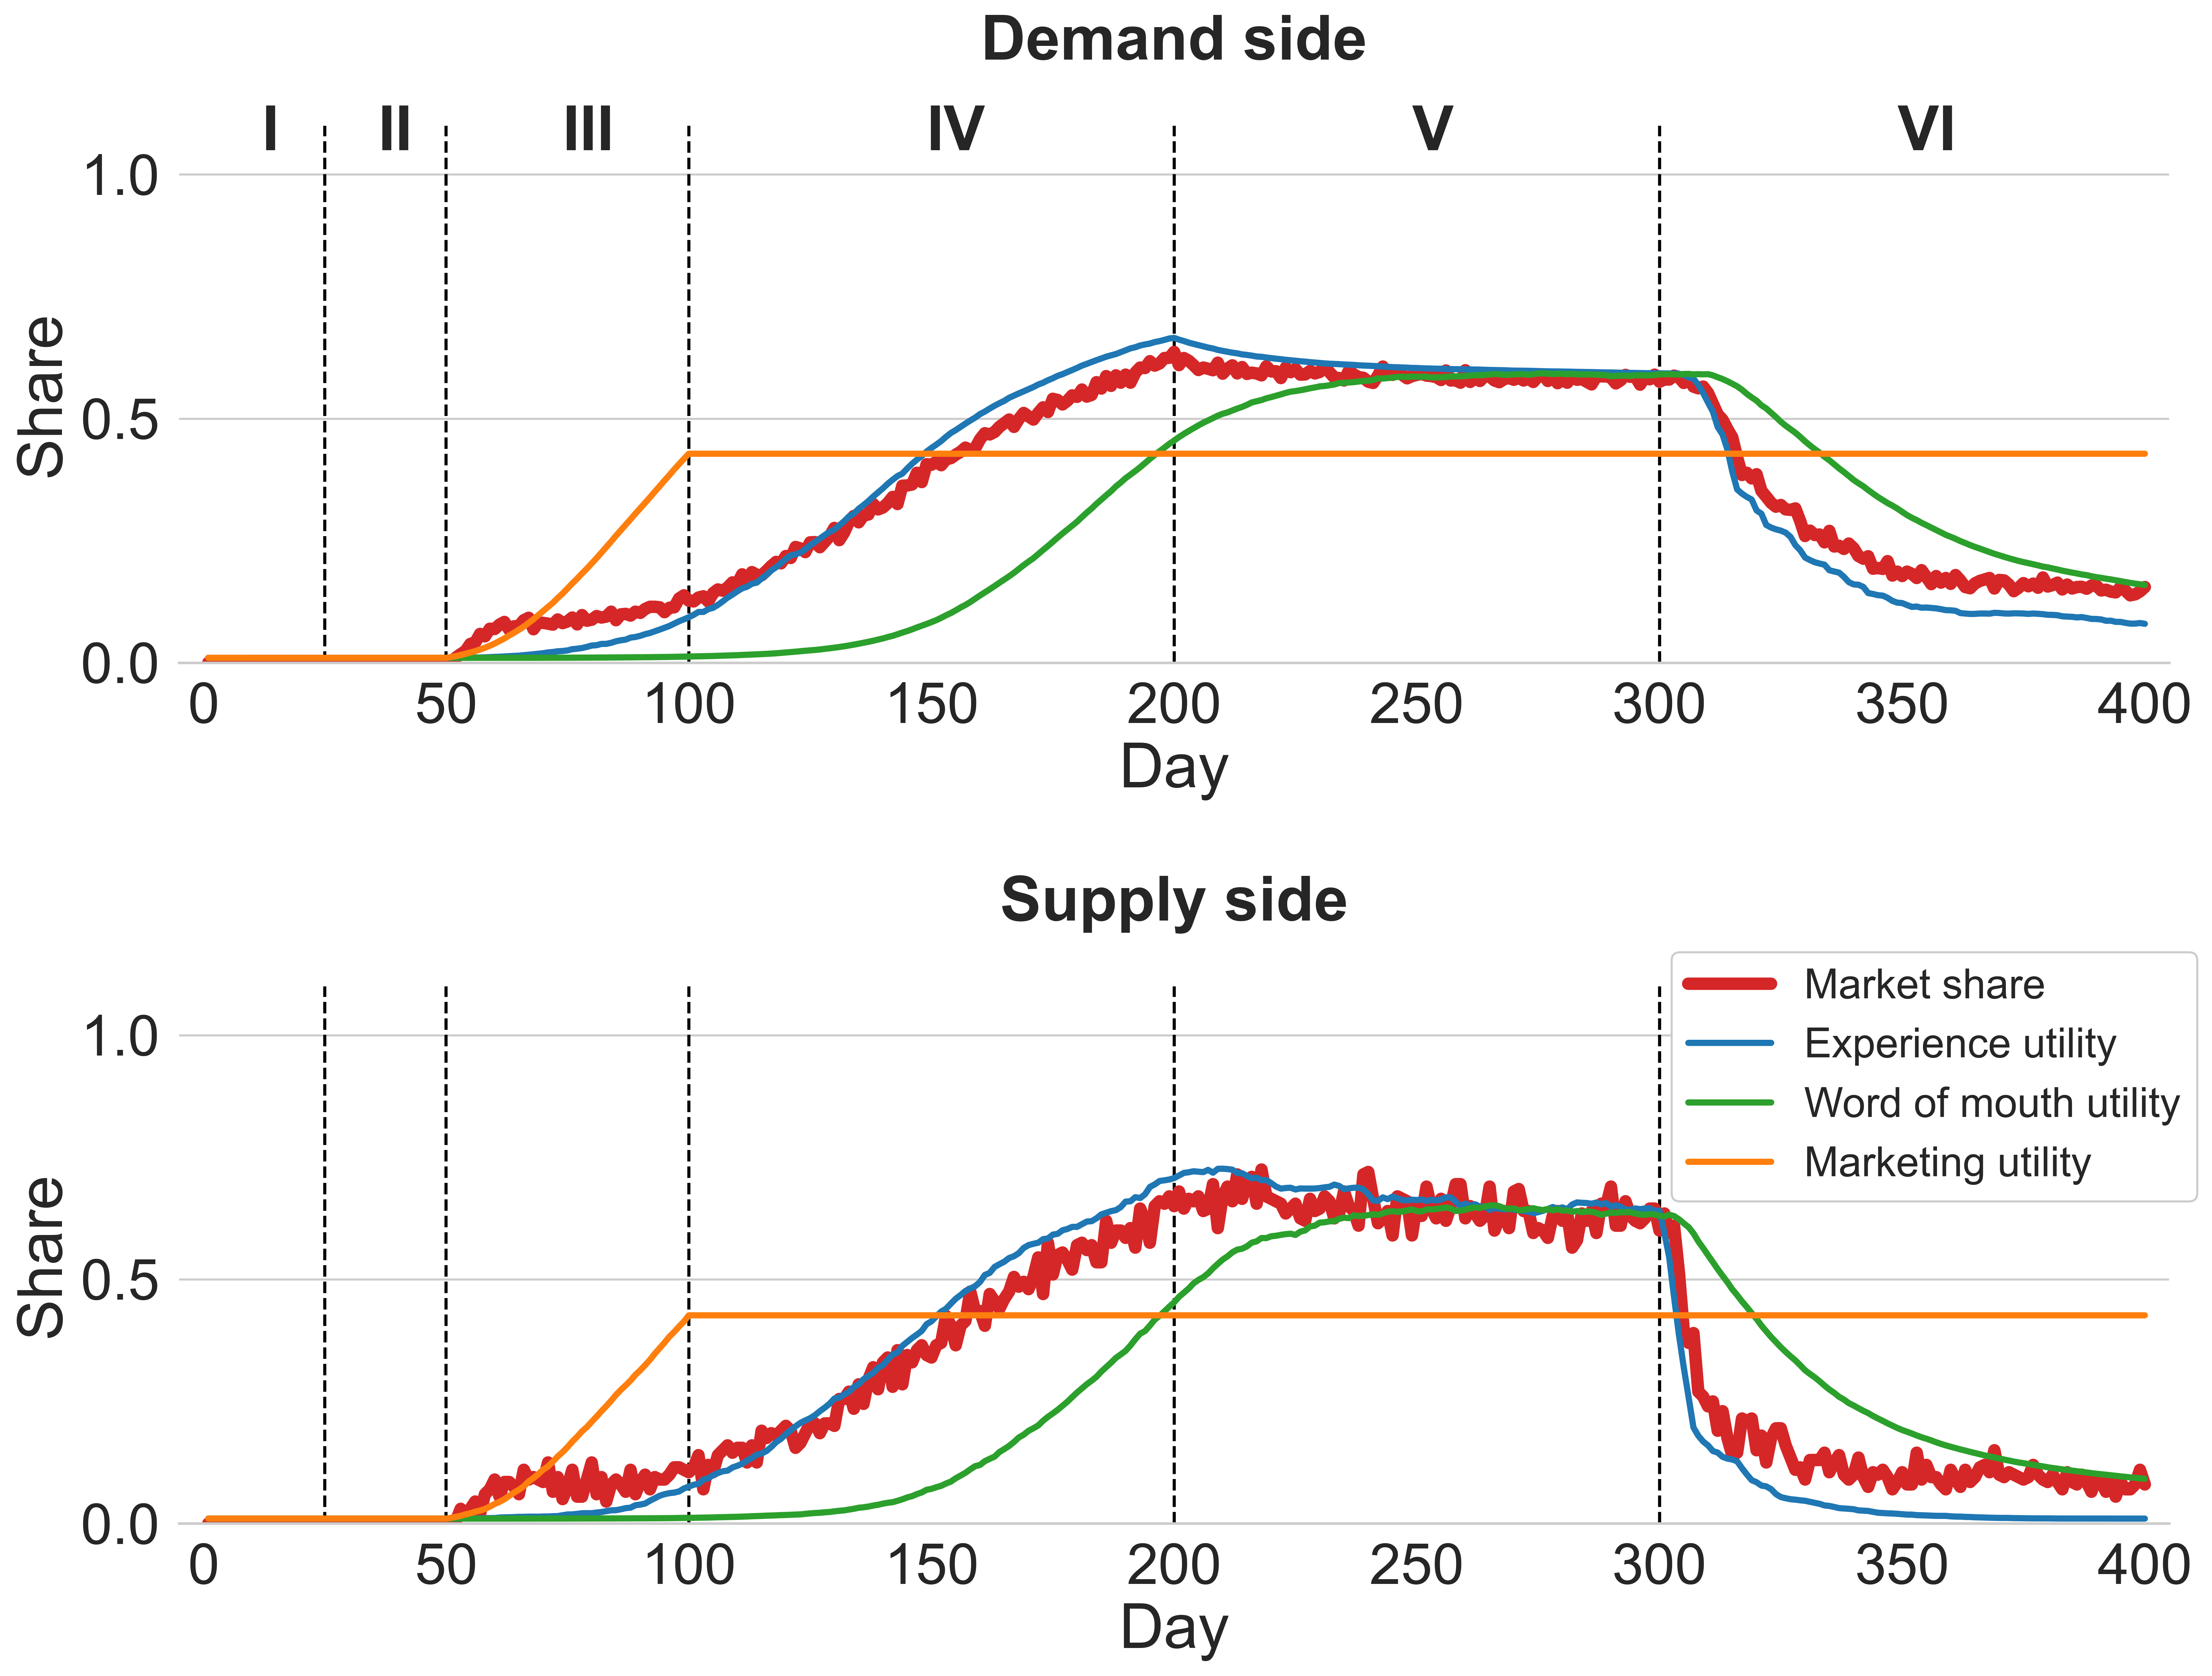

In [101]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=2.5)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,12))
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=6, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=3, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=3, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=3, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center', x=0.5, y=1.1);ax[1].set_title('Supply side',fontweight='bold', loc='center', x=0.5, y=1.1)
ax[1].legend(frameon=True,framealpha=1, loc=(0.75,0.6), fontsize=20)#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[0].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig4.png')

#### Figure 5:  Evolution of key performance indicators for the supply (top) and demand (bottom)

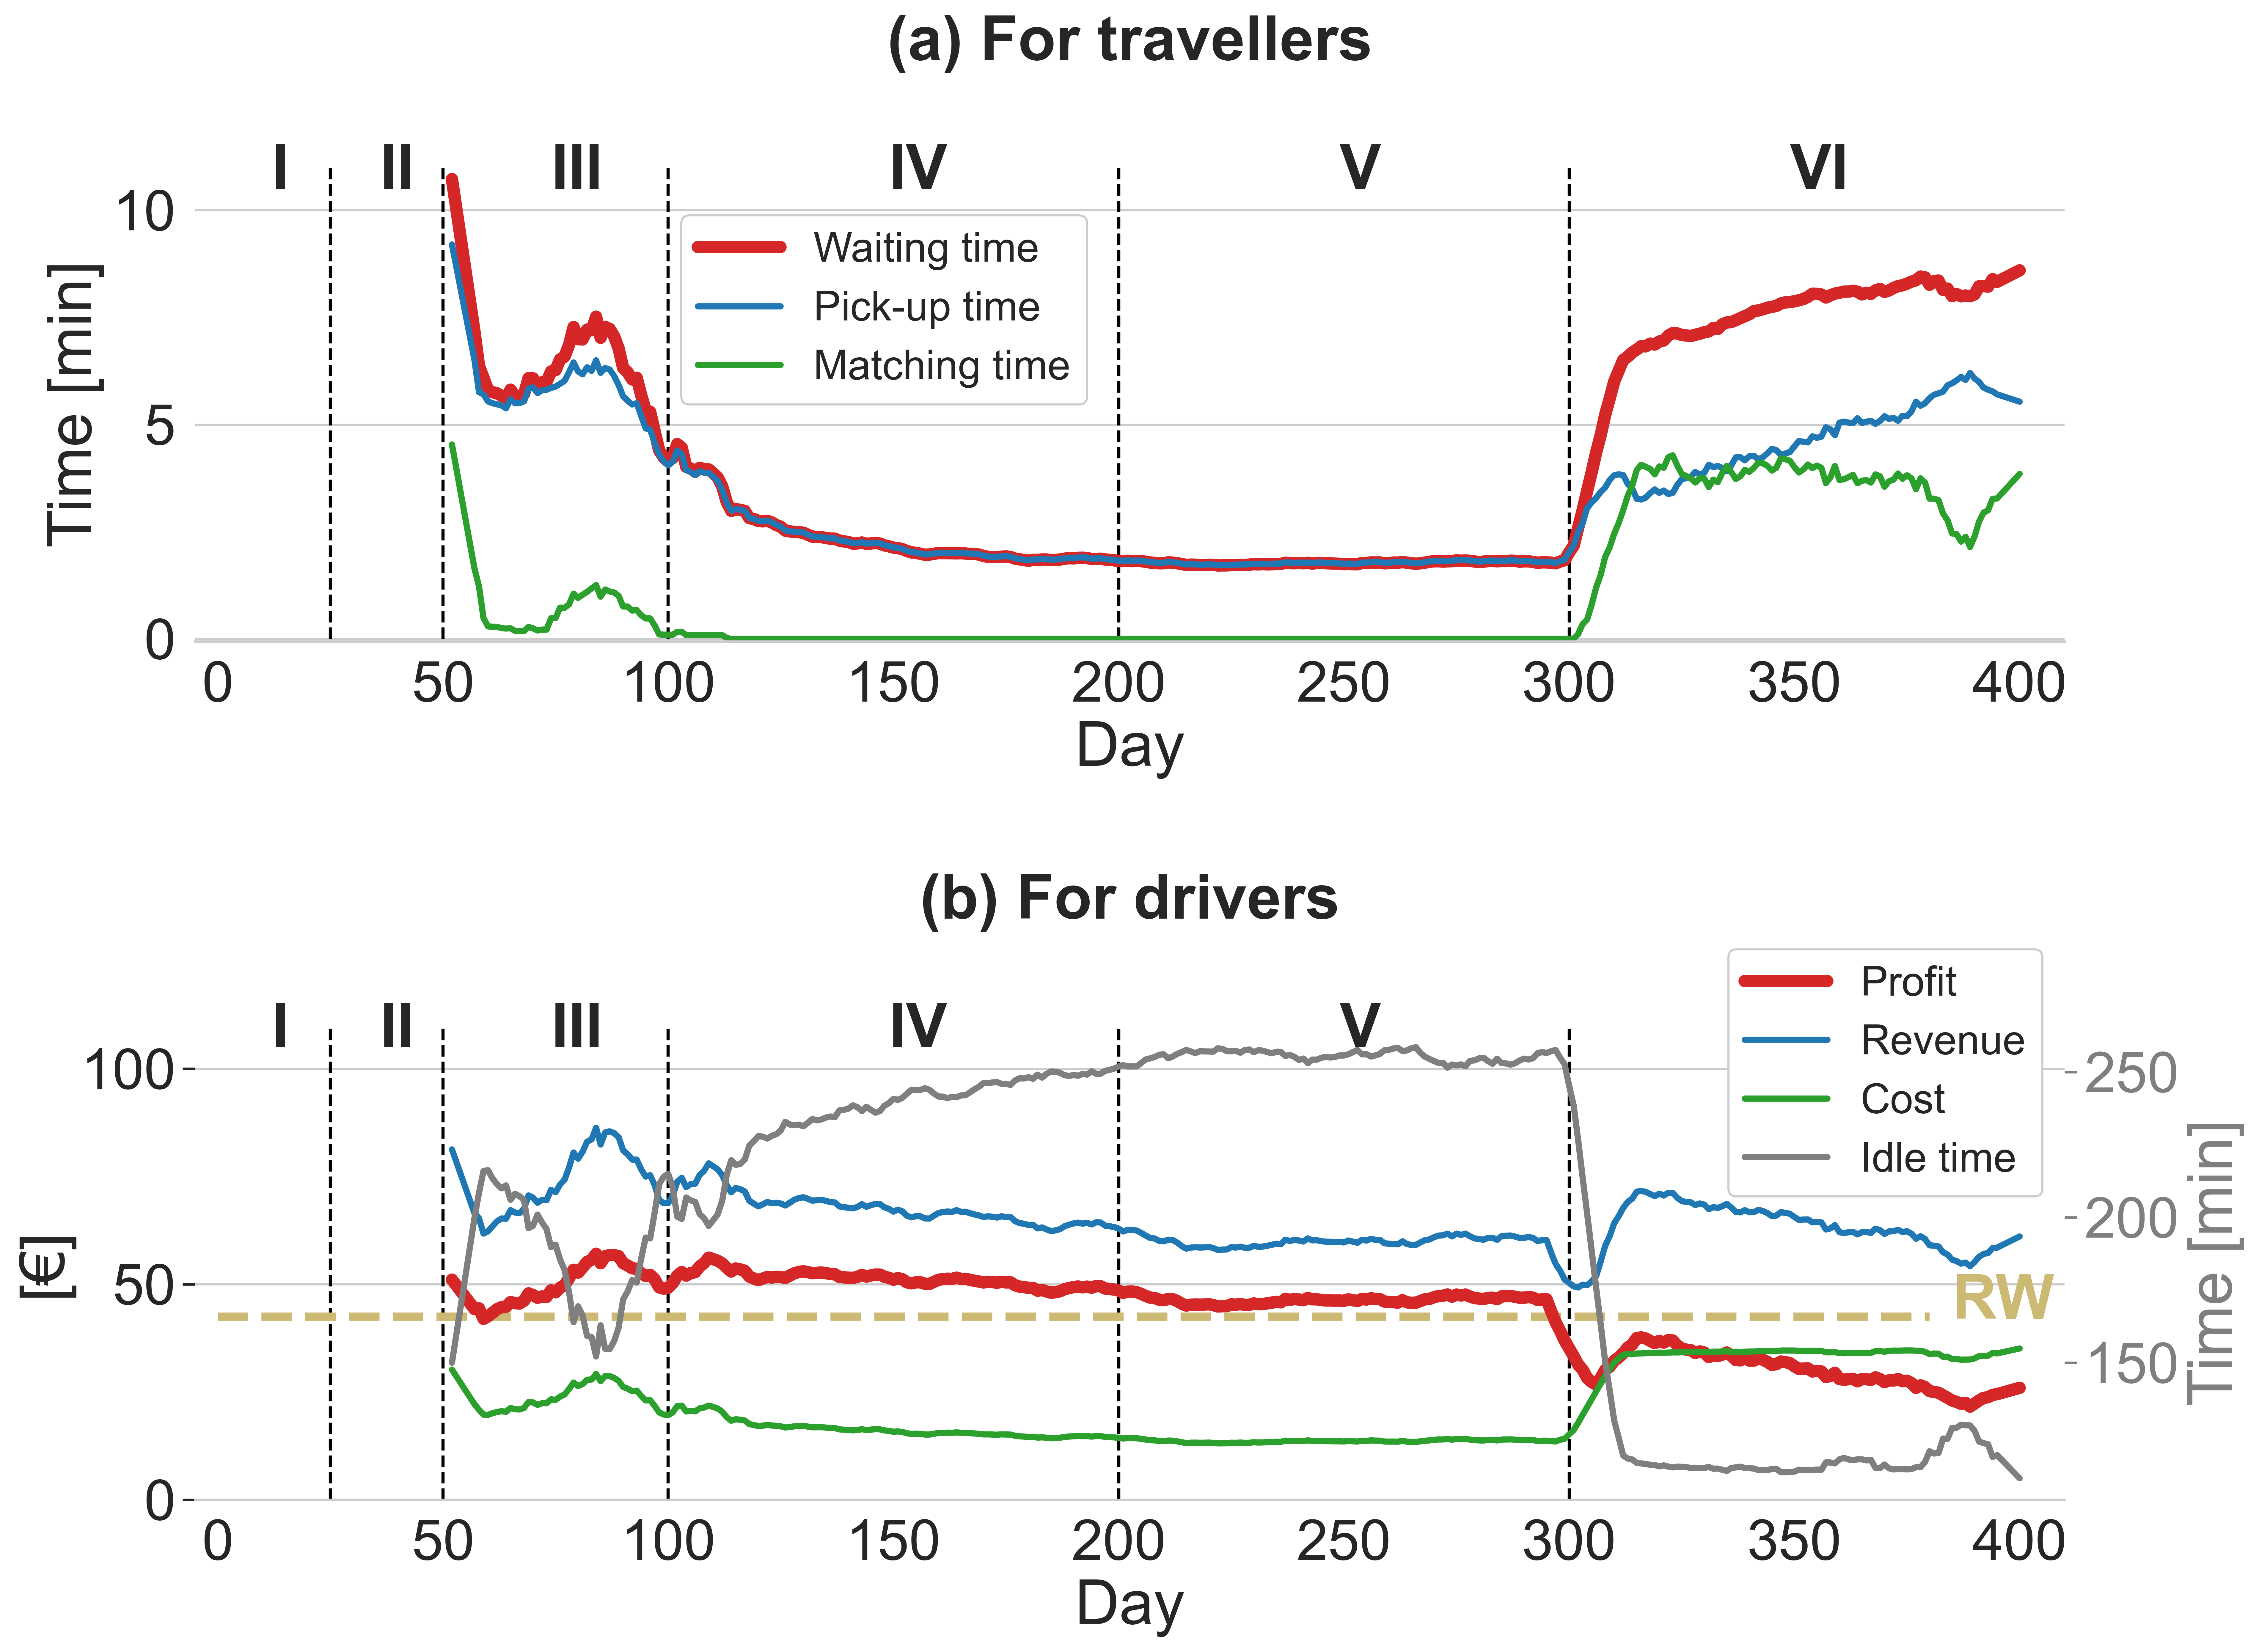

In [131]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=2.5)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(nrows=2, figsize=(16,12))
sns.despine(left=True)

x = [];yw = [];yp = [];yi = [];ym = [];yr = [];yprof = [];yc = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    yw.append(df[df.OUT==False].ACTUAL_WT.mean()) # Waiting time per passenger
    ym.append(df[df.OUT==False].MATCHING_T.mean()) # Matching time per passenger
    
    df = sim.res[d].veh_exp
    yp.append(df[df.OUT==False].ARRIVES_AT_PICKUP.mean()/(df[df.OUT==False].nRIDES.mean()*60))
    yi.append(df[df.OUT==False].IDLE_TIME.mean()/60)
    yr.append(df[df.OUT==False].REVENUE.mean())
    yprof.append(df[df.OUT==False].ACTUAL_INC.mean())
    yc.append(df[df.OUT==False].COST.mean())

yw = smooth(yw);ym = smooth(ym);yp = smooth(yp);yi = smooth(yi);yr = smooth(yr);yprof = smooth(yprof);yc = smooth(yc)

x = [i for i in range(1,len(yp)+1)]
sns.lineplot(x=x, y=yw, label = 'Waiting time', color='C3',lw=6, ax=ax[0])#, marker='o')
sns.lineplot(x=x, y=yp, label = 'Pick-up time', color='C0',lw=3, ax=ax[0])#, marker='o')
sns.lineplot(x=x, y=ym, label = 'Matching time', color='C2',lw=3, ax=ax[0])#, marker='o')
sns.lineplot(x=x, y=yprof, label = 'Profit', color='C3',lw=6, ax=ax[1])#, marker='o')
sns.lineplot(x=x, y=yr, label = 'Revenue', color='C0',lw=3, ax=ax[1])#, marker='o')
sns.lineplot(x=x, y=yc, label = 'Cost', color='C2',lw=3, ax=ax[1])#, marker='o')ax.twinx()
ax11 = ax[1].twinx()
sns.lineplot(x=x, y=yi, label = 'Idle time', color='C7',lw=3, ax=ax11)#, marker='o')
ax11.set(ylabel='Time [min]')
ax11.grid(b=None)

lines, labels = ax[1].get_legend_handles_labels()
lines2, labels2 = ax11.get_legend_handles_labels()
ax[1].legend(lines + lines2, labels + labels2,framealpha=1, loc=(0.82,0.64), fontsize=20)
ax11.legend().remove()
# ax11.spines['right'].set_color('C7')
ax11.tick_params(axis='y', colors='C7')
ax11.yaxis.label.set_color('C7')

for i in [0,1]:
    ax[i].grid(axis='x')

ax[0].vlines([25, 50, 100, 200, 300], 0, 11, linestyles='dashed', colors='black')
ax[1].vlines([25, 50, 100, 200, 300], 0, 110, linestyles='dashed', colors='black')
ax[1].hlines([params.d2d.res_wage], 0, 380, linestyles='dashed', colors='y', lw=4)
ax[1].annotate('RW', xy =(385,42), fontweight='bold', color='y')

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,10.5),(36,10.5),(74,10.5),(149,10.5),(249,10.5),(349,10.5)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')
for i in range(0,6):
    coords = [(12,105),(36,105),(74,105),(149,105),(249,105),(349,105)]
    ax[1].annotate(value[i], xy =coords[i], fontweight='bold')    
    
ax[0].set(xlabel='Day', ylabel='Time [min]', ylim=(-0.06,11), xlim=(-5,410)); ax[1].set(xlabel='Day', ylabel='[€]', ylim=(0,110),xlim=(-5,410))
ax[0].legend(loc=(0.26,0.5),framealpha=1, fontsize=20)
sns.despine(left=True)

ax[0].set_title('(a) For travellers',fontweight='bold', x=0.5, y=1.2)
ax[1].set_title('(b) For drivers',fontweight='bold', x=0.5, y=1.2)

plt.tight_layout()
# plt.savefig('Fig5.png')

#### Figure 6: Sensitivity analysis of the proposed model

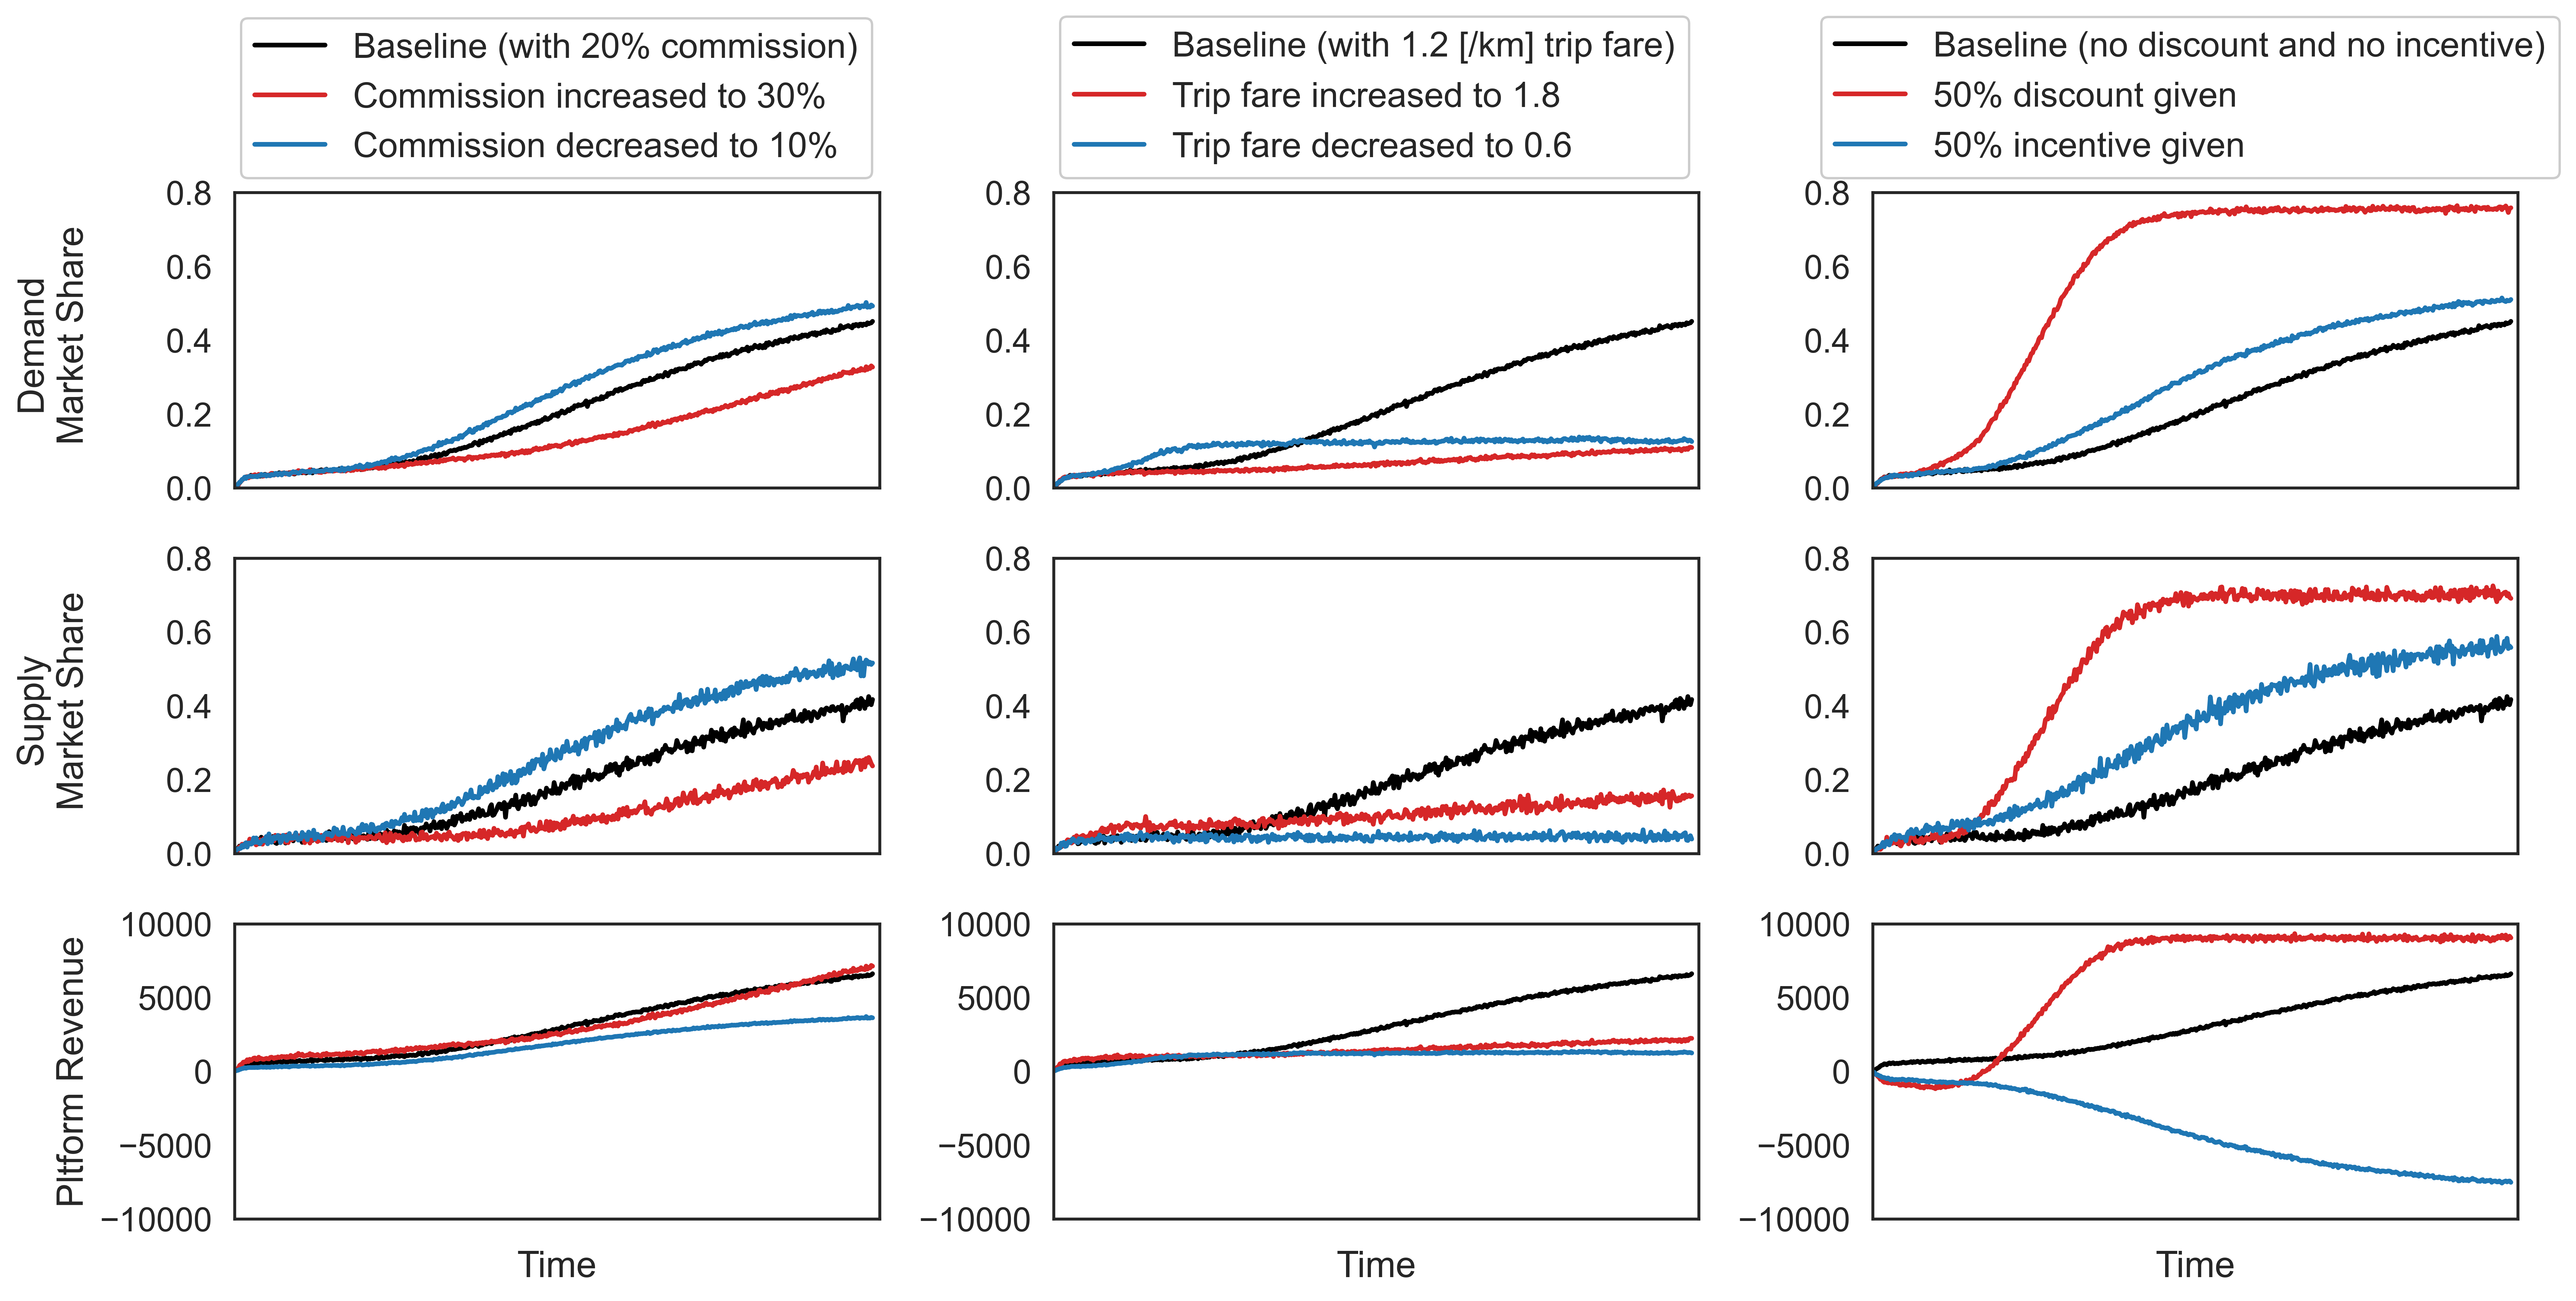

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.3)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

pallete = sns.color_palette("tab10")
c2=pallete[3]; c3=pallete[0]
lw = 2
start_date = pd.Timestamp('2012-07-01 00:00:00'); end_date = pd.Timestamp('2022-12-30 00:00:00')

for row in range(0,3):
    
    lx = [i for i in range(1,nD+1)]
    if row==0:
        n=10000; label='Demand side'
        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_d.date, y=df_c30_d.OUT/n, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_d.date, y=df_c10_d.OUT/n, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (with 1.2 [/km] trip fare)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_d.date, y=df_f18_d.OUT/n, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_d.date, y=df_f06_d.OUT/n, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])

        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (no discount and no incentive)', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_d.date, y=df_disc50_d.OUT/n, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_incen50_d.date, y=df_incen50_d.OUT/n, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
    elif row==1:
        n = 1000; label='Supply side'
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_s.date, y=df_c30_s.OUT/n, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_s.date, y=df_c10_s.OUT/n, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (with 1.2 [/km] trip fare)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_s.date, y=df_f18_s.OUT/n, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_s.date, y=df_f06_s.OUT/n, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])
    
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (no discount and no incentive)', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_s.date, y=df_disc50_s.OUT/n, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_incen50_s.date, y=df_incen50_s.OUT/n, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
    elif row==2:
        n = 1000; label='Platform'
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_d.date, y=df_c30_d.OUT*df_c30_d.plat_revenue, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_d.date, y=df_c10_d.OUT*df_c10_d.plat_revenue, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_d.date, y=df_f18_d.OUT*df_f18_d.plat_revenue, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_d.date, y=df_f06_d.OUT*df_f06_d.plat_revenue, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])
    
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (no discount and no incentive)', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_d.date, y=df_disc50_d.OUT*df_disc50_d.plat_revenue, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        x = df_incen50_d.OUT*df_incen50_d.plat_revenue
        r = (x*100)/20; r = (r*80/100)*0.5; p = x-r
        sns.lineplot(x=df_incen50_d.date, y=p, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
    for col in range(0,3):
        ax[row][col].set(xlabel='', ylabel=None,xlim=(start_date, end_date), ylim=(0,0.8))
        ax[row][col].set(xlabel='', ylabel=None,xlim=(start_date, end_date), ylim=(0,0.8))
        ax[row][col].set(ylabel=None)
        ax[row][col].set_xticklabels([])
        ax[row][col].get_legend().set_visible(False)

ax[0][0].set(xlabel='', ylabel='Demand \n Market Share',xlim=(start_date, end_date), ylim=(0,0.8))
ax[1][0].set(xlabel='', ylabel='Supply \n Market Share',xlim=(start_date, end_date), ylim=(0,0.8))
ax[2][0].set(xlabel='Time', ylabel='Pltform Revenue',xlim=(start_date, end_date), ylim=(-10000,10000))
ax[2][1].set(xlabel='Time',xlim=(start_date, end_date), ylim=(-10000,10000))
ax[2][2].set(xlabel='Time',xlim=(start_date, end_date), ylim=(-10000,10000))

ax[0][0].legend(frameon=True, framealpha=1, fontsize=15, loc=(0.01,1.05))
ax[0][1].legend(frameon=True, framealpha=1, fontsize=15, loc=(0.01,1.05))
ax[0][2].legend(frameon=True, framealpha=1, fontsize=15, loc=(-0.08,1.05))

# fig.subplots_adjust(left=0.2, wspace=0.6)
fig.align_ylabels()

plt.tight_layout()
# plt.savefig('Fig6.png')